[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Jeremynadal33/adventofcode2020/blob/master/adventofcode2020.ipynb)


In [409]:
import pandas as pd
import re
import numpy as np
import os

import matplotlib.pyplot as plt
import networkx as nx

In [3]:
root_dir = '/Users/jeremynadal/Documents/adventofcode/adventofcode2020/'
file_path = root_dir + 'inputs/input_3.txt'

# Day 2 

In [18]:
data = pd.read_csv(root_dir+'input_2.txt',sep = '\n', header = None)
data.columns = ['raw']

In [19]:
data['raw'][0].split(' ')

['1-4', 'm:', 'mrfmmbjxr']

In [42]:
check = []

for ind in range(data.shape[0]):
    min_letter = int(data['raw'][ind].split(' ')[0].split('-')[0])
    max_letter = int(data['raw'][ind].split(' ')[0].split('-')[1])
    letter     = data['raw'][ind].split(' ')[1].split(':')[0]
    passcode   = data['raw'][ind].split(' ')[2]

    check.append( (passcode.count(letter)<=max_letter) and  (passcode.count(letter)>=min_letter))
    
data['check'] = check

In [44]:
data['check'].sum()

607

In [71]:
check = []
for ind in range(data.shape[0]):
    first_letter = int(data['raw'][ind].split(' ')[0].split('-')[0])
    second_letter = int(data['raw'][ind].split(' ')[0].split('-')[1])
    letter     = data['raw'][ind].split(' ')[1].split(':')[0]
    passcode   = data['raw'][ind].split(' ')[2]

    check.append( (passcode[first_letter-1]==letter or passcode[second_letter-1]==letter ) 
                 and not (passcode[first_letter-1]==letter and passcode[second_letter-1]==letter ) )
data['check'] = check

In [72]:
data['check'].sum()

321

# Day 3

In [80]:
file = 'input_3.txt'
with open(root_dir+file,"rt") as infile:
    data =  np.matrix([list(line.strip()) for line in infile.readlines()])
print(data.shape)

(323, 31)


In [78]:
data.shape
data[0,0]

'.'

In [121]:
mult = 1
directions = [[1,1],[1,3],[1,5],[1,7],[2,1]] # One down and three right

for direction in directions : 
    print('direction :',direction)
    pos = [0,0]
    trees = 0
    while pos[0] < (data.shape[0]-1) : 
        pos[0] += direction[0]
        pos[1] += direction[1]
        if pos[1] >= data.shape[1]:
            pos[1] = pos[1] - data.shape[1]
        if data[pos[0],pos[1]] == '#':
            trees += 1
    mult *= trees
        
    print(pos,trees)
print(mult)

direction : [1, 1]
[322, 12] 60
direction : [1, 3]
[322, 5] 286
direction : [1, 5]
[322, 29] 76
direction : [1, 7]
[322, 22] 62
direction : [2, 1]
[322, 6] 45
3638606400


# Day 4

In [97]:
file_path = root_dir+'inputs/input_4.txt'

if os.path.exists(file_path):
    file = open(file_path,'r')
    
raw = file.read()
raw = raw[:-1]

In [98]:
raw = raw.split('\n\n')

In [99]:
raw = [re.sub('\n',' ',r) for r in raw ]

In [100]:
raw

['ecl:hzl byr:1926 iyr:2010 pid:221225902 cid:61 hgt:186cm eyr:2021 hcl:#7d3b0c',
 'hcl:#efcc98 hgt:178 pid:433543520 eyr:2020 byr:1926 ecl:blu cid:92 iyr:2010',
 'iyr:2018 eyr:2026 byr:1946 ecl:brn hcl:#b6652a hgt:158cm pid:822320101',
 'iyr:2010 hgt:138 ecl:grn pid:21019503 eyr:1937 byr:2008 hcl:z',
 'byr:2018 hcl:z eyr:1990 ecl:#d06796 iyr:2019 hgt:176in cid:75 pid:153cm',
 'byr:1994 hcl:#ceb3a1 hgt:176cm cid:80 pid:665071929 eyr:2024 iyr:2020 ecl:grn',
 'cid:280 byr:1955 ecl:blu hgt:155cm hcl:#733820 eyr:2013 iyr:2011 pid:2346820632',
 'hcl:#4a5917 hgt:61cm pid:4772651050 iyr:2026 ecl:brn byr:2015 eyr:2026',
 'iyr:2019 hcl:#a97842 hgt:182cm eyr:2024 ecl:gry pid:917294399 byr:1974',
 'ecl:#9c635c pid:830491851 hgt:175cm cid:141 iyr:2010 hcl:z byr:2026 eyr:1998',
 'byr:1927 iyr:2011 pid:055176954 ecl:gry hcl:#7d3b0c eyr:2025 hgt:166cm',
 'hcl:#733820 byr:2008 ecl:utc eyr:1920 pid:159cm hgt:66cm iyr:2030',
 'pid:027609878 eyr:2022 iyr:2012 byr:1960 hgt:157cm hcl:#b6652a cid:117 ecl:gr

In [101]:
data = pd.DataFrame(columns=['byr','iyr','eyr', 'hgt', 'hcl', 'ecl', 'pid','cid'])

In [102]:
for passport in raw : 
    passport = passport.split(' ')
    dic = {}
    for info in passport : 
        #print(info,info.split(':'))
        dic[info.split(':')[0]] = info.split(':')[1]
    data = data.append(dic,ignore_index=True)

In [103]:
data.drop('cid', axis = 1, inplace = True)
print(data.shape)

(290, 7)


In [104]:
data.dropna(axis=0,inplace=True)

In [105]:
print('There is a total of {} valid passport for part 1'.format(data.shape[0]))

There is a total of 237 valid passport for part 1


In [106]:
data.describe()

,byr,iyr,eyr,hgt,hcl,ecl,pid
count,237,237,237,237,237,237,237
unique,97,32,37,84,52,28,236
top,1955,2014,2026,151cm,z,grn,155cm
freq,6,31,25,13,19,34,2


In [107]:
print(data.shape,'\n' ,data.dtypes)

(237, 7) 
 byr    object
iyr    object
eyr    object
hgt    object
hcl    object
ecl    object
pid    object
dtype: object


In [108]:
data['byr'] = data['byr'].astype(int)
data['iyr'] = data['iyr'].astype(int)
data['eyr'] = data['eyr'].astype(int)

In [109]:
data.head()

,byr,iyr,eyr,hgt,hcl,ecl,pid
0,1926,2010,2021,186cm,#7d3b0c,hzl,221225902
1,1926,2010,2020,178,#efcc98,blu,433543520
2,1946,2018,2026,158cm,#b6652a,brn,822320101
3,2008,2010,1937,138,z,grn,21019503
4,2018,2019,1990,176in,z,#d06796,153cm


In [110]:
# Putting one filter per condition
data = data[ 1920 <= data['byr'] ]
data = data[ data['byr'] <= 2002 ]

data = data[ 2010 <= data['iyr'] ]
data = data[ data['iyr'] <= 2020 ]

data = data[ 2020 <= data['eyr'] ]
data = data[ data['eyr'] <= 2030 ]


In [112]:
# For the other characteristics, must do differently
valid_ecl = ['amb', 'blu', 'brn', 'gry', 'grn', 'hzl', 'oth']

for ind in data.index : 
    to_drop = False
    # Looking for invalid height
    if data['hgt'][ind][-2:]=='cm':
        if (150 <= int(data['hgt'][ind][:-2]) ) and ( int(data['hgt'][ind][:-2]) <= 193) :
            pass
        else : 
            to_drop = True
    elif data['hgt'][ind][-2:]=='in':
        if (59 <= int(data['hgt'][ind][:-2]) ) and ( int(data['hgt'][ind][:-2]) <= 76) :
            pass
        else : 
            to_drop = True
    else :
        to_drop = True
        
        
    # Looking for invalid hair color 
    if (data['hcl'][ind][0]=='#' and len(re.findall('[0-9A-Fa-f]',data['hcl'][ind] )) == 6) :
        pass
    else : 
        to_drop = True
        
    # Looking for invalid eye color 
    if data['ecl'][ind] in valid_ecl : 
        pass
    else : 
        to_drop = True
    
    # Looking for invalid pid 
    if len(re.findall('[0-9A-Fa-f]', data['pid'][ind] )) == 9 :
        pass
    else :
        to_drop = True
        
    if to_drop : data.drop(ind, axis = 0, inplace = True)

In [113]:
print('The number of valid passport after part 2 is', data.shape[0])

The number of valid passport after part 2 is 172


In [91]:
ind = 0
if len(re.findall('[0-9A-Fa-f]', data['pid'][ind] )) == 9 :
    print('oui')

oui


In [79]:
len(re.findall('[0-9A-Fa-f]', 'aas30d@sa20'))

8

# Day 5

In [187]:
file_path = root_dir+'inputs/input_5.txt'

if os.path.exists(file_path):
    data = pd.read_csv(file_path,sep = '\n', header = None)

In [188]:
data.columns = ['spec']

In [189]:
def row_to_binary(raw_row):
    bin_row = re.sub('F','0',raw_row)
    bin_row = re.sub('B','1',bin_row)
    
    return bin_row

def col_to_binary(raw_col):
    bin_col = re.sub('R','1',raw_col)
    bin_col = re.sub('L','0',bin_col)
    return bin_col

def bin_to_num(binary):
    summ = 0
    binary = binary[::-1]
    for i in range(len(binary)) : 
        summ += int(binary[i])*2**i
    return summ

def convert_spec(spec):
    raw_row = spec[:7]
    raw_col = spec[7:]
    
    bin_row = row_to_binary(raw_row)
    bin_col = col_to_binary(raw_col)
    
    row = bin_to_num(bin_row)
    col = bin_to_num(bin_col)
    #print('raw:',raw_row,raw_col)
    #print('bin:',bin_row,bin_col)
    #print('num:',row,col)
    return row,col
    

In [190]:
cols = []
rows = []
for raw in data['spec']:
    conv = convert_spec(raw)
    rows.append(conv[0])
    cols.append(conv[1])
data['row'] = rows
data['col'] = cols
data['seatID'] = 8*data['row']+data['col']

In [191]:
data

,spec,row,col,seatID
0,FFBBBFFLRL,28,2,226
1,BFFBFBFRLR,74,5,597
2,FFFBBFBRRR,13,7,111
3,BFFBBBBRRL,79,6,638
4,FFFBBFBLLR,13,1,105
...,...,...,...,...
876,BFFFBBFLLR,70,1,561
877,FFFBFBFRLL,10,4,84
878,FFFBBBBRRR,15,7,127
879,FBFBBBFRRL,46,6,374


In [192]:
data.describe()

,row,col,seatID
count,881.000000,881.000000,881.000000
mean,58.591373,3.491487,472.222474
std,31.846273,2.295298,254.767033
min,4.000000,0.000000,32.000000
25%,31.000000,1.000000,252.000000
50%,59.000000,3.000000,472.000000
75%,86.000000,5.000000,692.000000
max,114.000000,7.000000,913.000000


In [195]:
print('On the list, the max seat ID is',np.max(data['seatID']))

On the list, the max seat ID is 913


In [216]:
sorted_ID = np.sort(data['seatID'])
for ind in range(1,len(sorted_ID)-1):
    if not(sorted_ID[ind]-1 == sorted_ID[ind-1]):
        print('The only seat left is ',sorted_ID[ind]-1)
                    

The only seat left is  717


# Day 6

In [288]:
file_path = root_dir+'inputs/input_6.txt'

if os.path.exists(file_path):
    file = open(file_path,'r')
    
raw = file.read()
raw = raw[:-1]

#raw='abc\n\na\nb\nc\n\nab\nac\n\na\na\na\na\n\nb'

In [289]:
groups = raw.split('\n\n')

In [290]:
len(groups)

500

In [291]:
summ = 0
for group in groups : 
    group = re.sub('\n','',group)
    group = [g for g in group]
    group = np.unique(group)
    
    summ += len(group)
print('For part 1, the sum is :',summ)

For part 1, the sum is : 6742


In [292]:
summ = 0
for group in groups : 
    nb_in_gp = len(group.split('\n'))
    group = re.sub('\n','',group)
    group = [g for g in group]
    uniq, count = np.unique(group, return_counts = True)
    filtre = count==nb_in_gp
    summ += np.sum(filtre)
    #print(group, nb_in_gp, count,filtre,np.sum(filtre))
print('For part 2, the sum is :',summ)

For part 2, the sum is : 3447


# Day 7 

In [810]:
file_path = root_dir+'inputs/input_7.txt'
#file_path = root_dir+'inputs/example_input_7.txt'

if os.path.exists(file_path):
    file = open(file_path,'r')
    
raw = file.read()
raw = raw[:-1]

In [811]:
rules = raw.split('\n')
print(len(rules))

594


In [812]:
rules

['vibrant salmon bags contain 1 vibrant gold bag, 2 wavy aqua bags, 1 dotted crimson bag.',
 'dotted plum bags contain 3 wavy cyan bags.',
 'muted salmon bags contain 2 pale purple bags, 3 dull orange bags, 2 dotted lime bags, 3 clear crimson bags.',
 'wavy green bags contain 1 plaid crimson bag.',
 'light salmon bags contain 3 posh lime bags, 1 plaid plum bag, 3 faded yellow bags, 4 clear fuchsia bags.',
 'dim violet bags contain 4 drab tan bags, 4 drab violet bags, 2 faded coral bags, 4 dark white bags.',
 'dim black bags contain 4 posh lime bags.',
 'drab indigo bags contain 4 light aqua bags, 2 light white bags, 4 clear plum bags.',
 'clear purple bags contain 4 drab olive bags, 2 vibrant chartreuse bags.',
 'wavy indigo bags contain 3 clear maroon bags, 4 striped blue bags, 2 wavy gray bags, 2 dim magenta bags.',
 'drab olive bags contain 2 shiny salmon bags, 4 mirrored white bags, 4 mirrored fuchsia bags.',
 'plaid crimson bags contain 2 dull chartreuse bags, 4 striped maroon bag

In [813]:
colors = []

for rule in rules : 
    rule = rule.split(' ')
    print(rule)
    for word in range(len(rule)) :
        if 'bag' in rule[word] : 
            colors.append(rule[word-2]+' '+rule[word-1])
        

['vibrant', 'salmon', 'bags', 'contain', '1', 'vibrant', 'gold', 'bag,', '2', 'wavy', 'aqua', 'bags,', '1', 'dotted', 'crimson', 'bag.']
['dotted', 'plum', 'bags', 'contain', '3', 'wavy', 'cyan', 'bags.']
['muted', 'salmon', 'bags', 'contain', '2', 'pale', 'purple', 'bags,', '3', 'dull', 'orange', 'bags,', '2', 'dotted', 'lime', 'bags,', '3', 'clear', 'crimson', 'bags.']
['wavy', 'green', 'bags', 'contain', '1', 'plaid', 'crimson', 'bag.']
['light', 'salmon', 'bags', 'contain', '3', 'posh', 'lime', 'bags,', '1', 'plaid', 'plum', 'bag,', '3', 'faded', 'yellow', 'bags,', '4', 'clear', 'fuchsia', 'bags.']
['dim', 'violet', 'bags', 'contain', '4', 'drab', 'tan', 'bags,', '4', 'drab', 'violet', 'bags,', '2', 'faded', 'coral', 'bags,', '4', 'dark', 'white', 'bags.']
['dim', 'black', 'bags', 'contain', '4', 'posh', 'lime', 'bags.']
['drab', 'indigo', 'bags', 'contain', '4', 'light', 'aqua', 'bags,', '2', 'light', 'white', 'bags,', '4', 'clear', 'plum', 'bags.']
['clear', 'purple', 'bags', 'co

## The idea is to create a graph, the steps are : 
* First, identify for each rule, the number of bags this rule applies to
* If more than one bag is concerned (if it is not an end), identify which colors are mentioned and the number of bags they can contain
* The first mentioned is the container and the other(s) are contained
* Then add a new connection to the graph 

In [814]:
# Dict to directly draw graph
graph = {}

for rule in rules : 
    rule = rule.split(' ')
    container = ''
    colors_bags = []
    numbers_bags = []
    for word in range(len(rule)) :
        if 'bag' in rule[word] : 
            if container == '':
                container = rule[word-2]+' '+rule[word-1]
            elif rule[word-2]+' '+rule[word-1] == 'no other' : 
                pass
            else : 
                colors_bags.append(rule[word-2]+' '+rule[word-1])
                numbers_bags.append(rule[word-3])
    
    graph[container] = colors_bags

In [815]:
# Array containing all edges of the graphs -> easier to include weights
edges = []

for rule in rules : 
    rule = rule.split(' ')
    container = ''
    colors_bags = []
    numbers_bags = []
    for word in range(len(rule)) :
        if 'bag' in rule[word] : 
            if container == '':
                container = rule[word-2]+' '+rule[word-1]
            elif rule[word-2]+' '+rule[word-1] == 'no other' : 
                pass
            else : 
                color = rule[word-2]+' '+rule[word-1]
                number = rule[word-3]
                edges.append( [container, color, number] )
                

In [843]:
def create_graph_from_array(edges):
    G = nx.DiGraph()
    
    for edge in edges : 
        G.add_edge(edge[0], edge[1], weight= edge[2])
    
    return G

def display_graph(G, method = nx.circular_layout):
    
    plt.figure(figsize=(20,15))

    options = {
        "font_size": 10,
        "node_size": 6000,
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 2,
        "width": 2,
    }


    pos = method(G)  # positions for all nodes

    nx.draw(G,pos, **options)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

    # labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

    plt.axis("off")
    plt.show()
    
def get_roots(G):
    roots = []
    for node in G.nodes :
        if G.in_degree(node) == 0 : # it's a root
            roots.append(node)
    return roots

def get_leafs(G):
    leafs = []
    for node in G.nodes :
        if G.out_degree(node) == 0 : # it's a root
            leafs.append(node)
    return leafs

def get_paths_to(graph, node):
    roots = get_roots(graph)
    paths = []
    for root in roots : 
        for path in nx.all_simple_paths(graph,root,node) :
            paths.append(path)
    return paths

def get_paths_from(graph, node):
    leafs = get_leafs(graph)
    paths = []
    for leaf in leafs : 
        for path in nx.all_simple_paths(graph,node,leaf) :
            paths.append(path)
    return paths

def path_to_weights(graph, path):
    assert len(path)>1,'path contains only one bag'
    
    weights = [0]
    for bag in range(len(path)-1):
        weights.append( int(graph.get_edge_data(path[bag],path[bag+1],'weight')['weight']) ) 
    
    return weights


def path_to_number_of_bags(graph,path):
    assert len(path)>1,'path contains only one bag'
    
    weight = path_to_weights(graph, path)
    summ = 0
    mul = 1
    for i in range(1,len(weight)):
        mul *= weight[i]
        summ += mul
    return summ

def find_common_path(path1, path2):
    common_path = []
    bag = 0
    while( path1[bag]==path2[bag] and bag < min(len(path1),len(path2)) ):
        common_path.append(path1[bag])
        bag += 1
    return common_path

def doubled_paths(paths):
    doubled = []
    for i in range(len(paths)-1):
        for j in range(i+1,len(paths)):
            common = find_common_path(paths[i],paths[j])
        
            if len(common) > 1: doubled.append(common)
    return doubled

In [817]:
G = create_graph_from_array(edges)
#G.add_edge('dark blue', 'copain', weight= 2)
#display_graph(G)

In [818]:
bag = 'shiny gold'

paths = get_paths_to(G, bag)
all_bags_in_paths =  [item for sublist in paths for item in sublist]
unique_bags = np.unique(all_bags_in_paths) # contains the bag of interest ! 
if unique_bags.shape[0]-1 >0 :
    num_containers = unique_bags.shape[0]-1
else :
    num_containers = 0
print('The number of bags that could contain {} is {}'.format(bag,num_containers))

The number of bags that could contain shiny gold is 272


In [823]:
bag = 'shiny gold'

paths = get_paths_from(G, bag)
weights = [path_to_weights(G, path) for path in paths]


print( paths)

[['shiny gold', 'bright beige', 'bright tomato', 'vibrant red', 'wavy gray', 'wavy cyan', 'striped olive'], ['shiny gold', 'dull crimson', 'faded beige', 'plaid lime', 'vibrant red', 'wavy gray', 'wavy cyan', 'striped olive'], ['shiny gold', 'dull crimson', 'faded beige', 'plaid lime', 'wavy gray', 'wavy cyan', 'striped olive'], ['shiny gold', 'mirrored maroon', 'bright magenta', 'wavy cyan', 'striped olive'], ['shiny gold', 'mirrored maroon', 'striped olive'], ['shiny gold', 'bright tomato', 'vibrant red', 'wavy gray', 'wavy cyan', 'striped olive'], ['shiny gold', 'bright beige', 'bright tomato', 'vibrant red', 'wavy gray', 'wavy cyan', 'drab silver'], ['shiny gold', 'dull crimson', 'faded beige', 'plaid lime', 'vibrant red', 'wavy gray', 'wavy cyan', 'drab silver'], ['shiny gold', 'dull crimson', 'faded beige', 'plaid lime', 'wavy gray', 'wavy cyan', 'drab silver'], ['shiny gold', 'mirrored maroon', 'bright magenta', 'wavy cyan', 'drab silver'], ['shiny gold', 'bright tomato', 'vibra

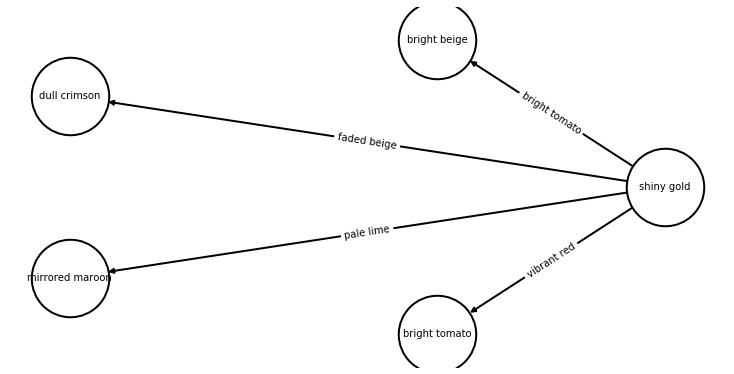

In [825]:
test = create_graph_from_array(paths)
display_graph(test)

In [820]:
summ = 0
for path in paths:
    summ += path_to_number_of_bags(G, path)
print(summ)

219267


In [845]:
doubled_summ = 0
for path in doubled_paths(paths) : 
    doubled_summ += path_to_number_of_bags(G, path)

print(doubled_summ)

126142


In [855]:
doubled = doubled_paths(paths)
for i in range(len(doubled)):
    print(doubled[i],'\n----------------\n')

['shiny gold', 'bright beige', 'bright tomato', 'vibrant red', 'wavy gray', 'wavy cyan'] 
----------------

['shiny gold', 'bright beige'] 
----------------

['shiny gold', 'bright beige', 'bright tomato', 'vibrant red', 'wavy gray', 'wavy cyan'] 
----------------

['shiny gold', 'bright beige'] 
----------------

['shiny gold', 'bright beige', 'bright tomato', 'vibrant red', 'wavy gray', 'wavy cyan'] 
----------------

['shiny gold', 'bright beige', 'bright tomato'] 
----------------

['shiny gold', 'bright beige'] 
----------------

['shiny gold', 'bright beige'] 
----------------

['shiny gold', 'bright beige', 'bright tomato', 'vibrant red', 'wavy gray'] 
----------------

['shiny gold', 'bright beige', 'bright tomato', 'vibrant red', 'wavy gray'] 
----------------

['shiny gold', 'bright beige', 'bright tomato', 'vibrant red', 'wavy gray', 'wavy cyan'] 
----------------

['shiny gold', 'bright beige', 'bright tomato', 'vibrant red', 'wavy gray'] 
----------------

['shiny gold', '

In [893]:
doubled = np.unique(doubled)
print(doubled)

[list(['shiny gold', 'bright beige'])
 list(['shiny gold', 'bright beige', 'bright tomato'])
 list(['shiny gold', 'bright beige', 'bright tomato', 'vibrant red'])
 list(['shiny gold', 'bright beige', 'bright tomato', 'vibrant red', 'wavy gray'])
 list(['shiny gold', 'bright beige', 'bright tomato', 'vibrant red', 'wavy gray', 'pale silver', 'dark teal'])
 list(['shiny gold', 'bright beige', 'bright tomato', 'vibrant red', 'wavy gray', 'wavy cyan'])
 list(['shiny gold', 'bright beige', 'bright tomato', 'vibrant red', 'wavy gray', 'wavy cyan', 'vibrant olive'])
 list(['shiny gold', 'bright beige', 'dark chartreuse', 'shiny blue'])
 list(['shiny gold', 'bright tomato'])
 list(['shiny gold', 'bright tomato', 'vibrant red'])
 list(['shiny gold', 'bright tomato', 'vibrant red', 'wavy gray'])
 list(['shiny gold', 'bright tomato', 'vibrant red', 'wavy gray', 'pale silver', 'dark teal'])
 list(['shiny gold', 'bright tomato', 'vibrant red', 'wavy gray', 'wavy cyan'])
 list(['shiny gold', 'bright

In [860]:
test = []

for i in range(len(doubled)):
    to_append = ''
    for j in range(len(doubled[i])):
        to_append += doubled[i][j]+' '
    to_append = to_append[:-1]
    test.append(to_append)

In [861]:
test = pd.DataFrame(test,columns=['data'])
test

,data
0,shiny gold bright beige bright tomato vibrant ...
1,shiny gold bright beige
2,shiny gold bright beige bright tomato vibrant ...
3,shiny gold bright beige
4,shiny gold bright beige bright tomato vibrant ...
...,...
614,shiny gold bright tomato vibrant red wavy gray
615,shiny gold dull crimson faded beige plaid lime
616,shiny gold mirrored maroon bright magenta
617,shiny gold mirrored maroon


In [890]:
to_drop = []
index = test.index
for ind in range(len(index)):
    for ind2 in range(ind,len(index)):
        #print(ind,ind2)
        if test.loc[index[ind]][0] in test.loc[index[ind2]][0] : 
            if index[ind] not in to_drop : to_drop.append(index[ind])
                #print()
            

KeyboardInterrupt: 

In [891]:
print(to_drop)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


In [697]:
path = 0
summ = 0
for path in paths: 
    summ += path_to_number_of_bags(G,path)
    print( path_to_number_of_bags(G,path) )
    
print(summ)

def ugly_trick(graph, paths):
    delt = []
    sous = 0
    for path in paths : 
        if path[1] not in delt :
            sous += int(graph.get_edge_data(path[0],path[1],'weight')['weight'])
            delt.append(path[1])
    return sous 

4
12
13
26
55


In [826]:
sub_edges = []
for path in paths :
    for ind in range(len(path)-1):
        sub_edges.append( [path[ind],path[ind+1],int(G.get_edge_data(path[ind],path[ind+1])['weight'])] )

In [827]:
sub_edges

[['shiny gold', 'bright beige', 4],
 ['bright beige', 'bright tomato', 2],
 ['bright tomato', 'vibrant red', 3],
 ['vibrant red', 'wavy gray', 5],
 ['wavy gray', 'wavy cyan', 2],
 ['wavy cyan', 'striped olive', 4],
 ['shiny gold', 'dull crimson', 3],
 ['dull crimson', 'faded beige', 2],
 ['faded beige', 'plaid lime', 5],
 ['plaid lime', 'vibrant red', 5],
 ['vibrant red', 'wavy gray', 5],
 ['wavy gray', 'wavy cyan', 2],
 ['wavy cyan', 'striped olive', 4],
 ['shiny gold', 'dull crimson', 3],
 ['dull crimson', 'faded beige', 2],
 ['faded beige', 'plaid lime', 5],
 ['plaid lime', 'wavy gray', 1],
 ['wavy gray', 'wavy cyan', 2],
 ['wavy cyan', 'striped olive', 4],
 ['shiny gold', 'mirrored maroon', 4],
 ['mirrored maroon', 'bright magenta', 3],
 ['bright magenta', 'wavy cyan', 2],
 ['wavy cyan', 'striped olive', 4],
 ['shiny gold', 'mirrored maroon', 4],
 ['mirrored maroon', 'striped olive', 3],
 ['shiny gold', 'bright tomato', 3],
 ['bright tomato', 'vibrant red', 3],
 ['vibrant red', 'wa

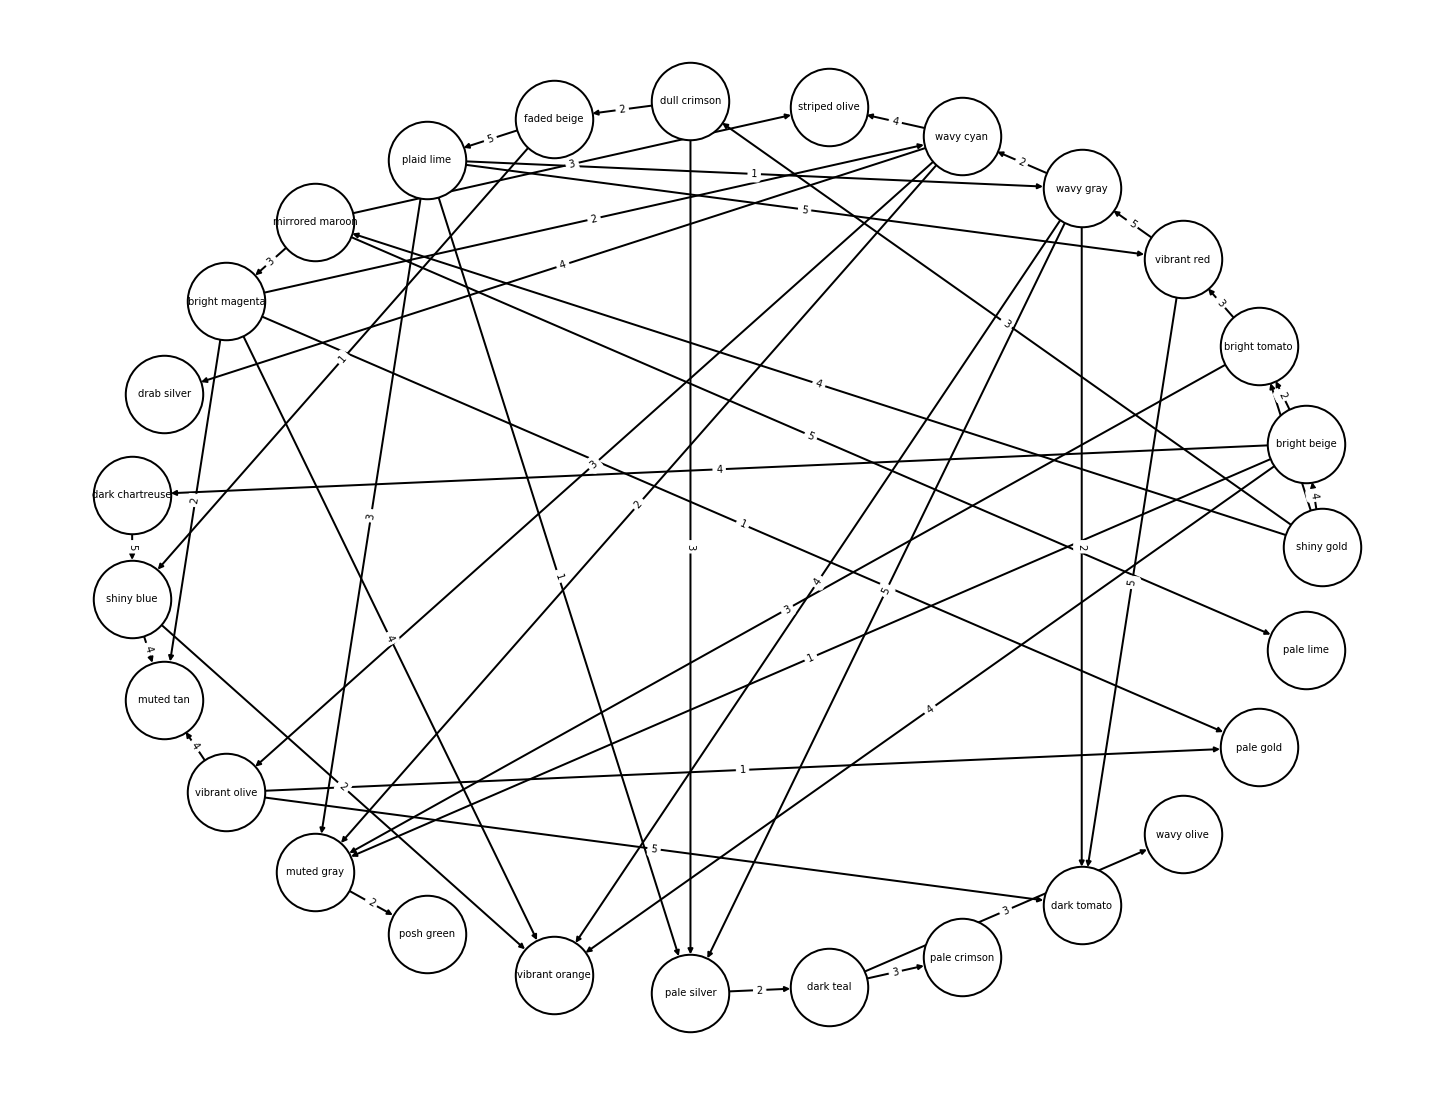

In [837]:
test = create_graph_from_array(sub_edges)

display_graph(test, method = nx.circular_layout)

In [556]:
unique_bags.shape

(284,)

In [ ]:
test = [1,3,5,6]
print( [mul for mul] )

In [519]:
bags = []
summ = 0
for root in roots : 
    for path in nx.all_simple_paths(G,root,'shiny gold') :
        print(path)
        bags.append(path)

['light red', 'bright white', 'shiny gold']
['light red', 'muted yellow', 'shiny gold']
['dark orange', 'bright white', 'shiny gold']
['dark orange', 'muted yellow', 'shiny gold']


In [687]:
roots = (v for v, d in test.in_degree() if d == 0)
leaves = [v for v, d in test.out_degree() if d == 0]
all_paths = []
for root in roots:
    paths = nx.all_simple_paths(test, root, leaves)
    all_paths.extend(paths)
all_paths

[['shiny gold', 'dark olive', 'faded blue'],
 ['shiny gold', 'dark olive', 'dotted black'],
 ['shiny gold', 'vibrant plum', 'faded blue'],
 ['shiny gold', 'vibrant plum', 'dotted black']]

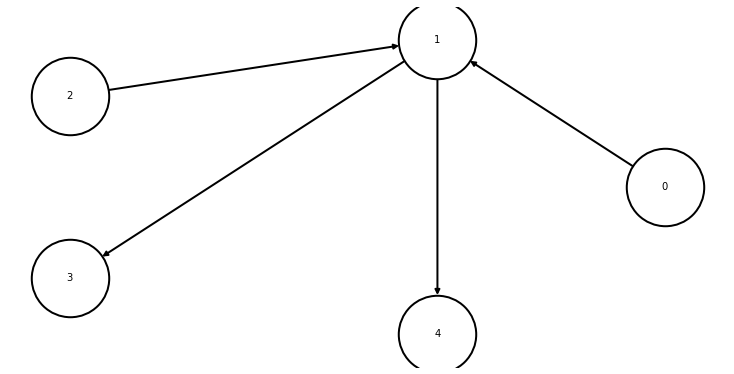

In [686]:
display_graph(G)

In [689]:
len_path = dict(nx.all_pairs_dijkstra(G, weight='weight'))

nodes = list(G.nodes())
results = pd.DataFrame()

starting_point = []
for i in range(len(nodes)):
    results = results.append(pd.DataFrame(len_path[nodes[i]]).T.reset_index())
    starting_point = starting_point + [nodes[i]]*len(len_path[nodes[i]][1])


paths_df = pd.DataFrame()
paths_df['starting_point'] = starting_point

results.columns = ['ending_point','weight','path']
results = results.reset_index()
del results['index']

results = pd.concat((paths_df,results),axis=1)

print(results)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [693]:
nx.node_connectivity(G,s='shiny gold',t= 'dotted black')

2